In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
WC=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
WC.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
WC=WC.drop_duplicates()

In [11]:
WC.dropna(subset=['Review Text'],inplace=True)

In [12]:
WC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22640 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22640 non-null  int64 
 1   Age                      22640 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review Text              22640 non-null  object
 4   Rating                   22640 non-null  int64 
 5   Recommended IND          22640 non-null  int64 
 6   Positive Feedback Count  22640 non-null  int64 
 7   Division Name            22627 non-null  object
 8   Department Name          22627 non-null  object
 9   Class Name               22627 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [13]:
WC.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# 1.clean reveiw text

In [14]:
def prior_split(data):
    data=re.sub("n't",'not',data)
    data=re.sub("i'm",'i am',data)
    data=re.sub("I'm","I am",data)
    data=re.sub("it's","it is",data)
    data=re.sub("It's","It is",data)
    return data
WC['Review Text']=WC['Review Text'].apply(prior_split)

In [15]:
# decided the split method 
def split_method(data):
    split_word=re.split('\W+',data)
    return split_word

In [ ]:
# the stop words 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not") 
new_stopping_words.extend(['would','could'])

In [214]:
def remove_stop(data):
    data=[word.lower()for word in data]
    return [word for word in data if word not in new_stopping_words]

In [163]:
def remove_num(data):
    return [word for word in data if word.isalpha()]

In [171]:
def clean_review(data):
    data1=split_method(data)
    data2=remove_stop(data1)
    final_data=remove_num(data2)
    return ' '.join(final_data)

In [215]:
WC['review_clean']=WC['Review Text'].apply(clean_review)

In [216]:
WC['length_review']=WC['review_clean'].apply(lambda x : len(x.split(' ')))

In [144]:
def number(data):
    return ' '.join(re.findall('([0-9]+\W?[0-9]+)',data))
def number_lbs(data):
    return ' '.join(re.findall('([0-9]+lb+.?)',data))


In [156]:
WC['number']=WC['Review Text'].apply(number)
WC['number_lbs']= WC['Review Text'].apply(number_lbs)

In [640]:
WC['have titile']=WC['Title'].notnull()

In [651]:
WC['have_number']= WC['number']!=''

In [661]:
WC['have_number']=WC['have_number']+0

In [663]:
WC['have titile']=WC['have titile']+0

In [679]:
WC.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,number,number_lbs,review_clean,length_review,have titile,have_number
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,,,absolutely wonderful silky sexy comfortable,5,0,0
1,1080,34,NaN,Love this dress! it is sooo pretty. i happen...,5,1,4,General,Dresses,Dresses,5'8,,love dress sooo pretty happened find store gla...,29,0,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,,,high hopes dress really wanted work initially ...,49,1,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it is fun, f...",5,1,0,General Petite,Bottoms,Pants,,,love love love jumpsuit fun flirty fabulous ev...,14,1,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,,,shirt flattering due adjustable front tie perf...,16,1,0


# 2.EDA and wordcloud

# WordCloud 

In [233]:
review_clean=WC.review_clean.values.tolist()

In [322]:
def word_cloud_data(review_clean_data,n):
    words_sp=[]
    for i in range(len(review_clean_data)):
        words_sp.extend(review_clean_data[i].split(' '))
    words_sp=pd.DataFrame({"all_words":words_sp})
    words_count=words_sp.groupby(['all_words'])['all_words'].count()
    wcl=words_count.sort_values(ascending=False).head(n)
    wcl_d={wcl.index[i]:wcl[i] for i in range(len(wcl))}
    return wcl_d

In [348]:
wcl_d=word_cloud_data(review_clean,100)

In [325]:
from wordcloud import WordCloud
def wordcloudfig(worddict):
    
    font_path='C:/Windows/Fonts/segoepr.ttf'
    wcloud = WordCloud(font_path=font_path, width=800, height=600,mode='RGBA', background_color=None)
    wc=wcloud.generate_from_frequencies(worddict) #根据词频，必须是字典形式
    plt.axis('off')
    plt.imshow(wc)

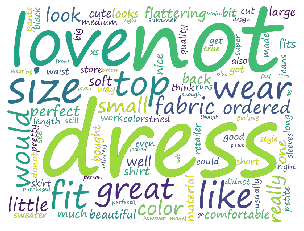

In [345]:
# the cloud for all data
wordcloudfig(wcl_d) 

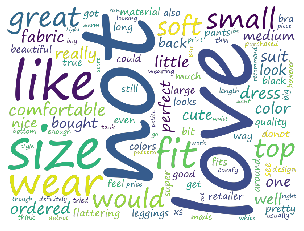

In [688]:
# the cloud for different product
# intimate
intimate = WC[WC["Department Name"]=="Intimate"]["review_clean"].tolist()
wcl_d_intimate = word_cloud_data(intimate,100)
wordcloudfig(wcl_d_intimate)

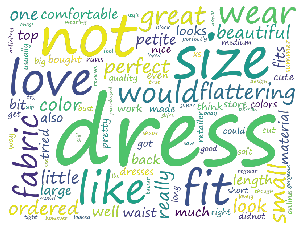

In [695]:
dresses = WC[WC["Department Name"]=="Dresses"]["review_clean"].tolist()
wcl_d_dresses = word_cloud_data(dresses,100)
wordcloudfig(wcl_d_dresses)

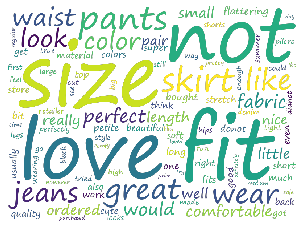

In [696]:
bottoms = WC[WC["Department Name"]=="Bottoms"]["review_clean"].tolist()
wcl_d_bottoms = word_cloud_data(bottoms,100)
wordcloudfig(wcl_d_bottoms)

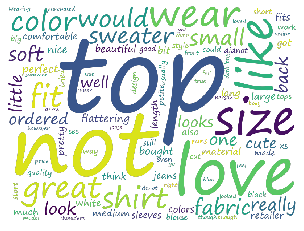

In [697]:
tops = WC[WC["Department Name"]=="Tops"]["review_clean"].tolist()
wcl_d_tops = word_cloud_data(tops,100)
wordcloudfig(wcl_d_tops)

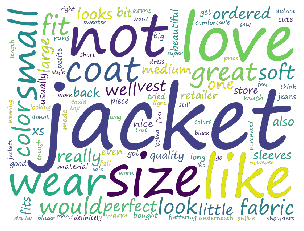

In [698]:
jackets = WC[WC["Department Name"]=="Jackets"]["review_clean"].tolist()
wcl_d_jackets = word_cloud_data(jackets,100)
wordcloudfig(wcl_d_jackets)

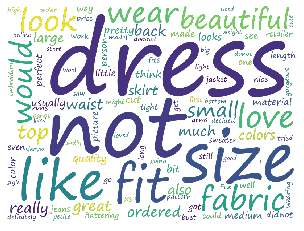

In [699]:
trend = WC[WC["Department Name"]=="Trend"]["review_clean"].tolist()
wcl_d_trend = word_cloud_data(trend,100)
wordcloudfig(wcl_d_trend)

In [704]:
# the cloud just for sentiment word.
sentimentword=['like','great','perfect','disappointed','love','hate','WOW','horrible','lucky','regret','happy',
               'glad','stunning','fantastic','sad','awful','disappointed','breathtaking','super','satisfied','upset',
               'bad','pleased','terrible','amazing','wonderful','cheerful','awesome']

In [702]:
def sentiment_word(data):
    data=[word.lower()for word in data]
    return [word for word in data if word in sentimentword]
def sentiment_review(data):
    data1=split_method(data)
    data2=sentiment_word(data1)
    return ' '.join(data2)

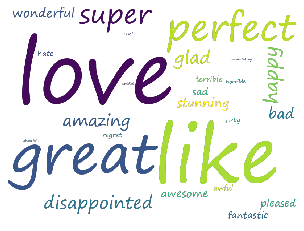

In [705]:
WC["sentiment_review"] = WC['Review Text'].apply(sentiment_review)
sentiment=WC.sentiment_review.values.tolist()
wcl_d_sentiment=word_cloud_data(sentiment,100)
wordcloudfig(wcl_d_sentiment)

In [339]:
#set the theme for visualization 
font_size = 20
sns.set_theme(style="white",
                  font='Times New Roman',
                  palette='rocket', ## deep, muted, bright, pastel, dark, colorblind
                  rc={
                      'font.size': font_size,
                      'axes.labelsize': font_size,
                      'axes.titlesize': font_size,
                      'xtick.labelsize': font_size,
                      'ytick.labelsize': font_size,
                      'legend.fontsize': font_size
                  })

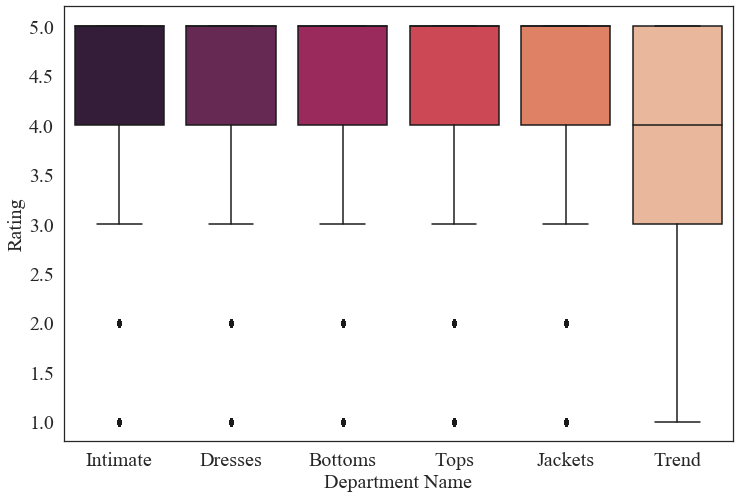

In [606]:
plt.figure(figsize=(12,8))
sns.boxplot(data=WC,x='Department Name',y='Rating')

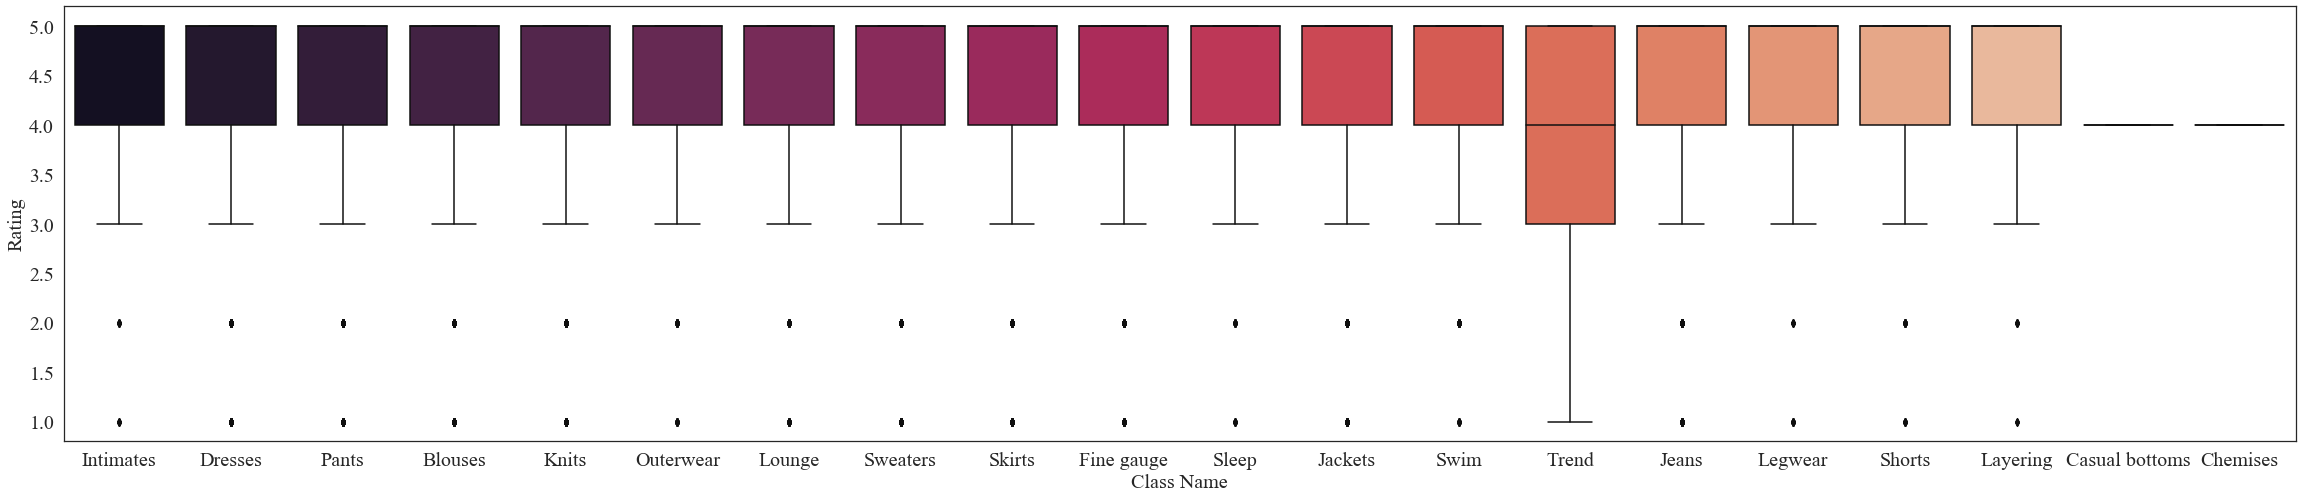

In [612]:
plt.figure(figsize=(40,8))
sns.boxplot(data=WC,x='Class Name',y='Rating',palette='rocket')  # trend is specail one. 

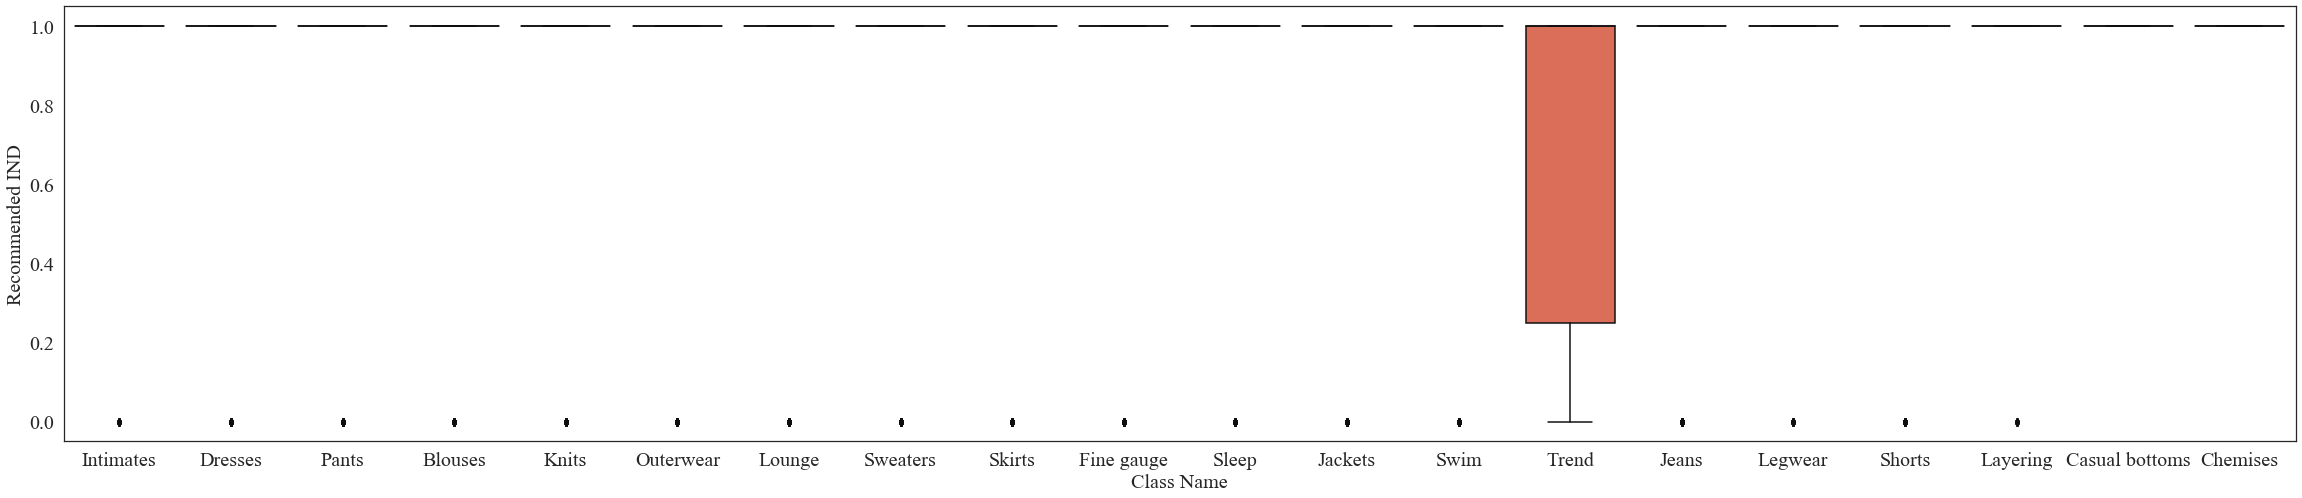

In [676]:
plt.figure(figsize=(40,8))
sns.boxplot(data=WC,x='Class Name',y='Recommended IND',palette='rocket')  # trend is specail one. 

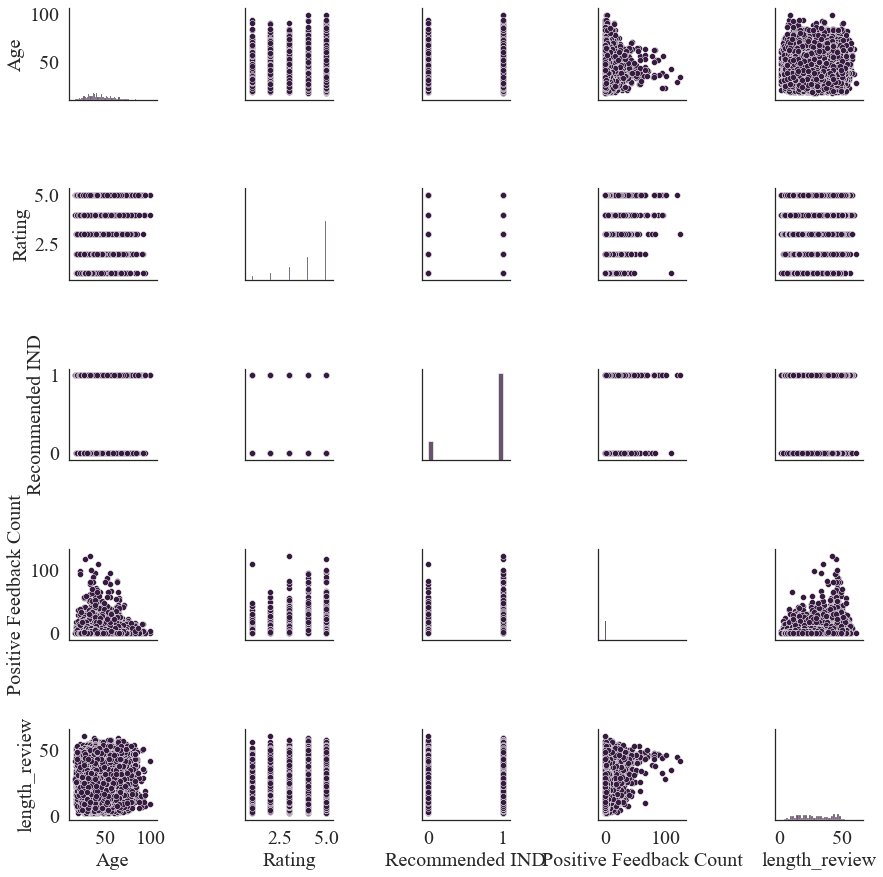

In [626]:
sns.pairplot(WC[['Age','Rating','Recommended IND','Positive Feedback Count','length_review']])

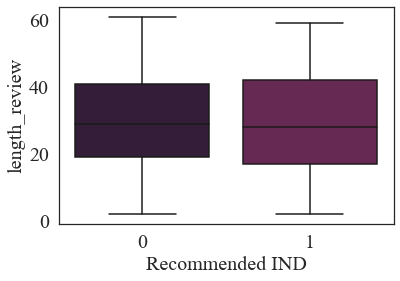

In [669]:
sns.boxplot(data=WC,y='length_review',x='Recommended IND')

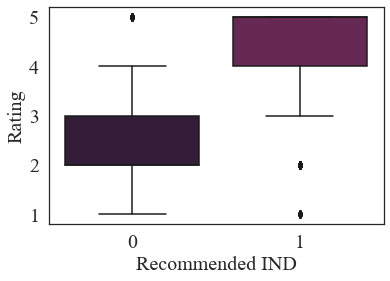

In [341]:
sns.boxplot(data=WC,x='Recommended IND',y='Rating')  # recommendation is related to the rating. 

([<matplotlib.patches.Wedge at 0x18a193f2898>,
 [Text(-0.20201592310876187, 1.1828734365140319, '5'),
  Text(-0.6287009849480196, -1.0221228260465522, '4'),
  Text(0.547839635660681, -0.9538719691862072, '3'),
  Text(0.9939146438690414, -0.47131059897129074, '2'),
  Text(1.0928694169725888, -0.12504574141486785, '1')],
 [Text(-0.11784262181344442, 0.6900095046331851, '55.4%'),
  Text(-0.3667422412196781, -0.596238315193822, '21.7%'),
  Text(0.29882161945128044, -0.5202938013742948, '12.5%'),
  Text(0.5421352602922043, -0.2570785085297949, '6.8%'),
  Text(0.5961105910759574, -0.06820676804447337, '3.6%')])

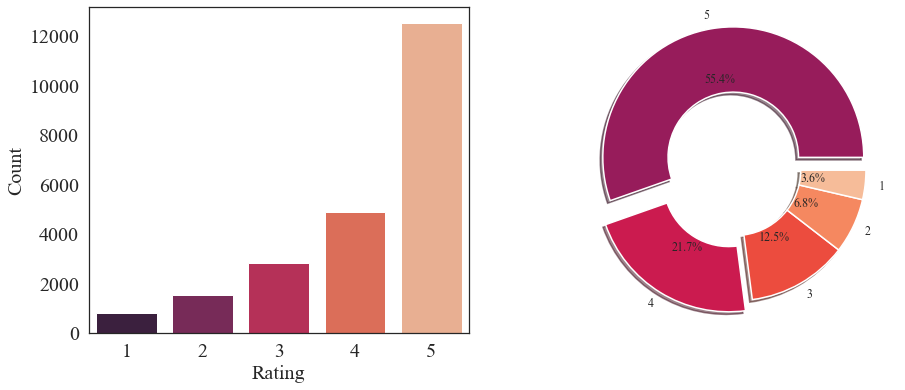

In [340]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.countplot(data=WC,x='Rating',palette='rocket') #选一个作图的颜色模板
ax.set_ylabel('Count')

plt.subplot(1,2,2)
colors=sns.color_palette(palette='rocket',n_colors=7) #取出sns里颜色版的颜色，应用于plt里
# sns.color_palette(palette='Set2',n_colors=10) 
colors=colors[2:]
explode=[0.1,0.1,0,0,0]
plt.pie(WC['Rating'].value_counts().values,labels=WC['Rating'].value_counts().index.to_list(),shadow=True,explode=explode,colors=colors,autopct='%.1f%%',wedgeprops = {'linewidth': 1.5,'width':0.5},textprops = {'fontsize':12})